In [1]:
#Importo dependencias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.pipeline import Pipeline
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.pipeline import make_pipeline
import joblib

In [2]:
#Extraigo los datos de internet y los cargo en dataframes de pandas.
data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep=r"\s+", skiprows=22, header=None)
data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
target = raw_df.values[1::2, 2]

In [3]:
#Agrego las etiquetas de cada feature al dataframe de inputs.
inputs = pd.DataFrame(data, columns = ['CRIM','ZN','INDUS','CHAS','NOX','RM','AGE','DIS','RAD','TAX','PTRATIO','B','LSTAT'])
inputs

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


In [4]:
#Agrego las etiquetas de cada feature al dataframe de labels.
labels = pd.DataFrame(target, columns=['MEDV'])
labels

,MEDV
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2
...,...
501,22.4
502,20.6
503,23.9
504,22.0


In [5]:
#Cargo el mejor modelo
gradientBoosting = joblib.load('randomForest.joblib')

In [6]:
y_predict = gradientBoosting.predict(inputs)
RMSE = np.sqrt(mean_squared_error(labels,y_predict))
print('RMSE:', RMSE)

RMSE: 1.945627931396656


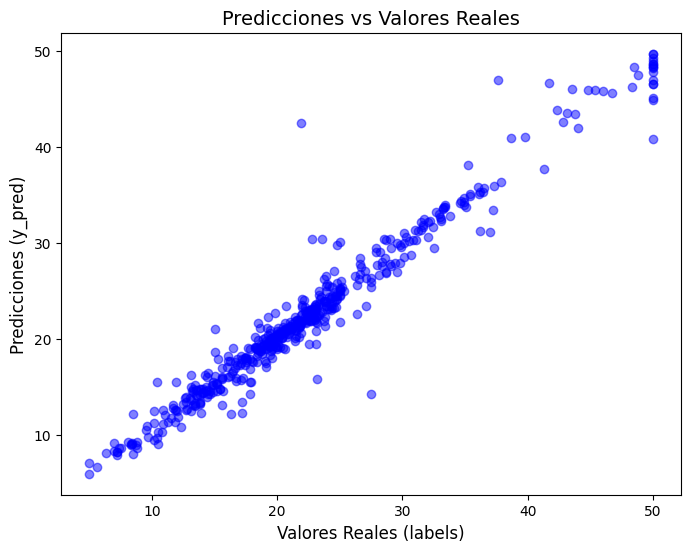

In [7]:
#Grafico predicciones vs valores reales
plt.figure(figsize=(8,6))
plt.scatter(labels, y_predict, color='blue', alpha=0.5)

plt.title("Predicciones vs Valores Reales", fontsize=14)
plt.xlabel("Valores Reales (labels)", fontsize=12)
plt.ylabel("Predicciones (y_pred)", fontsize=12)

plt.show()

**Observacion**:

Esto no esta del todo correcto ya que se realizan predicciones sobre datos del modelo que se utilizaron para el entrenamiento, lo que reduce considerablemente el valor del RMSE. Sin embargo se incluye como complemento para mostrar como funciona el modelo.